In [2]:
# Import modules
import csv
import shutil
import os, sys
import glob
import numpy as np
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Set directories
HOME_DIR = os.getcwd()
DATA_PATH = 'data/invasivespecies'
DATA_HOME_DIR = os.path.abspath(HOME_DIR+'/'+DATA_PATH)

path = DATA_HOME_DIR
# Use sample?
path = path + '/sample/'

train_path = path + '/train/'
valid_path = path + '/valid/'
test_path = path + '/test/'
results_path= path + '/results/'
model_path = path + '/models/'

In [3]:
# Settings
batch_size=64

# Folder ordering

## 1. Create train subdirectories and order images in labeled directories

In [6]:
print(path)

/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies


In [8]:
# Move train folder to backup and rename to train_unordered
%mkdir $DATA_HOME_DIR/backup
%mv $DATA_HOME_DIR/train $DATA_HOME_DIR/backup
%mv $DATA_HOME_DIR/backup/train $DATA_HOME_DIR/backup/train_unordered

mkdir: cannot create directory ‘/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/backup’: File exists
mv: cannot stat '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/train': No such file or directory


In [9]:
# Change test folder to test/unknown
%mv $DATA_HOME_DIR/test $DATA_HOME_DIR/unknown
%mkdir $DATA_HOME_DIR/test
%mv $DATA_HOME_DIR/unknown $DATA_HOME_DIR/test

In [10]:
# Remove all folders created by this script (not test/ and backup/)
%rm -r $DATA_HOME_DIR/results/
%rm -r $DATA_HOME_DIR/valid/
%rm -r $DATA_HOME_DIR/sample/
%rm -r $DATA_HOME_DIR/train/
%rm -r $DATA_HOME_DIR/models/

rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/results/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/valid/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/train/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/models/': No such file or directory


In [11]:
# Create directories
%mkdir -p $DATA_HOME_DIR/train/invasive/
%mkdir -p $DATA_HOME_DIR/train/non_invasive/
%mkdir -p $DATA_HOME_DIR/results/
%mkdir -p $DATA_HOME_DIR/models/

In [12]:
def list_pictures_by_label(csvfile):
    plantfile = []
    both = []
    labels = []
    with open(DATA_HOME_DIR+'/'+csvfile+'.csv', 'rb') as f:
        train_labels = csv.reader(f, delimiter=' ')
        temp = next(train_labels)
        for row in train_labels:
            both.append(row)
            plantfile.append(int(row[0][:-2]))
            labels.append(int(row[0][-1:]))
    invasive = [str(plantfile[i])+'.jpg' for i,x in enumerate(labels) if x==1]
    non_invasive = [str(plantfile[i])+'.jpg' for i,x in enumerate(labels) if x==0]
    return invasive, non_invasive

def copy_files_from_train_to_trainlabel(invasive, non_invasive):
    for i in range(len(invasive)):
        shutil.move(DATA_HOME_DIR+'/backup/train_unordered/'+invasive[i], DATA_HOME_DIR+'/train/invasive/')
    for j in range(len(non_invasive)):
        shutil.move(DATA_HOME_DIR+'/backup/train_unordered/'+non_invasive[j], DATA_HOME_DIR+'/train/non_invasive/')

In [16]:
copy_files_from_train_to_trainlabel(*list_pictures_by_label('train_labels'))

## 2. Create valid and sample directories

In [17]:
# Create directories
%mkdir -p $DATA_HOME_DIR/valid/invasive
%mkdir -p $DATA_HOME_DIR/valid/non_invasive
%mkdir -p $DATA_HOME_DIR/results

In [18]:
def move_from_train_to_valid():
    dirs = os.listdir(DATA_HOME_DIR+'/train')
    print(dirs)
    for iterator in dirs:
        if os.listdir(DATA_HOME_DIR+'/valid/'+iterator+'/') == []:
            g = glob.glob(DATA_HOME_DIR+'/train/'+iterator+'/'+'*.jpg')
            shuf = np.random.permutation(g)
            for i in range(int(math.ceil(0.08*len(g)))):
#                 print(DATA_HOME_DIR+'/valid/'+iterator+'/'+ os.path.basename(shuf[i]))
                shutil.move(shuf[i], DATA_HOME_DIR+'/valid/'+iterator+'/'+ os.path.basename(shuf[i]))
        else:
            print('/valid/'+ str(iterator)+ 'folder not empty')

In [19]:
move_from_train_to_valid()

['invasive', 'non_invasive']


In [20]:
# Remove directories
%rm -r $DATA_HOME_DIR/sample/results/
%rm -r $DATA_HOME_DIR/sample/valid/invasive/
%rm -r $DATA_HOME_DIR/sample/valid/non_invasive/
%rm -r $DATA_HOME_DIR/sample/train/invasive/
%rm -r $DATA_HOME_DIR/sample/train/non_invasive/
%rm -r $DATA_HOME_DIR/sample/test/unknown
%rm -r $DATA_HOME_DIR/sample/models/

rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/results/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/valid/invasive/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/valid/non_invasive/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/train/invasive/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/train/non_invasive/': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/test/unknown': No such file or directory
rm: cannot remove '/media/Data/Documents/Notebooks/Courses/fastai/data/invasivespecies/sample/models/': No such file or directory


In [21]:
# Create directories
%mkdir -p $DATA_HOME_DIR/sample/results/
%mkdir -p $DATA_HOME_DIR/sample/valid/invasive/
%mkdir -p $DATA_HOME_DIR/sample/valid/non_invasive/
%mkdir -p $DATA_HOME_DIR/sample/train/invasive/
%mkdir -p $DATA_HOME_DIR/sample/train/non_invasive/
%mkdir -p $DATA_HOME_DIR/sample/test/unknown
%mkdir -p $DATA_HOME_DIR/sample/models/

In [22]:
def create_samplefolder():
    dirs = os.listdir(DATA_HOME_DIR+'/train')
    if os.listdir(DATA_HOME_DIR+'/sample/train/'+dirs[0]+'/') == []:
        for iterator in dirs:
            g = glob.glob(DATA_HOME_DIR+'/train/'+iterator+'/'+'*.jpg')
            shuf = np.random.permutation(g)
            for i in range(20):
                shutil.copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/'+iterator+'/'+ os.path.basename(shuf[i]))
            for i in range(10):
                shutil.copyfile(shuf[i], DATA_HOME_DIR+'/sample/valid/'+iterator+'/'+ os.path.basename(shuf[i]))
    else:
        print('/sample/train/ or /sample/valid/ folder not empty')
    if os.listdir(DATA_HOME_DIR+'/sample/test/unknown/') == []:
        g = glob.glob(DATA_HOME_DIR+'/test/unknown/'+'*.jpg')
        shuf = np.random.permutation(g)
        for i in range(10):
                    shutil.copyfile(shuf[i], DATA_HOME_DIR+'/sample/test/unknown/'+ os.path.basename(shuf[i]))
    else:
        print('/sample/test/unknown/ folder not empty')

In [23]:
create_samplefolder()

# Create batches

In [251]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()
batches = gen.flow_from_directory(train_path, target_size=(224,224), batch_size=batch_size, class_mode='binary')
valbatches = gen.flow_from_directory(valid_path, target_size=(224,224), batch_size=batch_size, class_mode='binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [252]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import Callback

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []

    def on_batch_end(self, batch, logs={}):
        self.loss = np.append(self.loss, logs.get('loss'))
        self.acc = np.append(self.acc, logs.get('acc'))
        
    def on_epoch_end(self, batch, logs={}):
        self.val_loss = np.append(self.val_loss, logs.get('val_loss'))
        self.val_acc = np.append(self.val_acc, logs.get('val_acc'))

model = Sequential([
    BatchNormalization(input_shape=(3,224,224)),
    Flatten(),
    Dense(100, activation='softmax'),
    Dense(2, activation='softmax')
])

In [253]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [254]:
model.summary()
history = LossHistory()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_17 (BatchNorm (None, 3, 224, 224)   896         batchnormalization_input_17[0][0]
____________________________________________________________________________________________________
flatten_17 (Flatten)             (None, 150528)        0           batchnormalization_17[0][0]      
____________________________________________________________________________________________________
dense_33 (Dense)                 (None, 100)           15052900    flatten_17[0][0]                 
____________________________________________________________________________________________________
dense_34 (Dense)                 (None, 2)             202         dense_33[0][0]                   
Total params: 15,053,998
Trainable params: 15,053,550
Non-trainable params: 448
___________

In [255]:
nb_epoch = 10
model.fit_generator(batches, batches.nb_sample, nb_epoch=nb_epoch, validation_data=valbatches, nb_val_samples=valbatches.nb_sample, callbacks=[history])

Epoch 1/10
40/40 [==============================] - 3s - loss: 0.6877 - acc: 0.6000 - val_loss: 0.7057 - val_acc: 0.5000
Epoch 2/10
40/40 [==============================] - 4s - loss: 0.6107 - acc: 0.9000 - val_loss: 0.7093 - val_acc: 0.5000
Epoch 3/10
40/40 [==============================] - 3s - loss: 0.5991 - acc: 0.9250 - val_loss: 0.7095 - val_acc: 0.5000
Epoch 4/10
40/40 [==============================] - 3s - loss: 0.5979 - acc: 0.9500 - val_loss: 0.7216 - val_acc: 0.4000
Epoch 5/10
40/40 [==============================] - 3s - loss: 0.5978 - acc: 0.9250 - val_loss: 0.7284 - val_acc: 0.4000
Epoch 6/10
40/40 [==============================] - 2s - loss: 0.5974 - acc: 0.9250 - val_loss: 0.7218 - val_acc: 0.4000
Epoch 7/10
40/40 [==============================] - 2s - loss: 0.5963 - acc: 0.9500 - val_loss: 0.7117 - val_acc: 0.4000
Epoch 8/10
40/40 [==============================] - 2s - loss: 0.5955 - acc: 0.9500 - val_loss: 0.7031 - val_acc: 0.4500
Epoch 9/10
40/40 [==============

(0, 1)

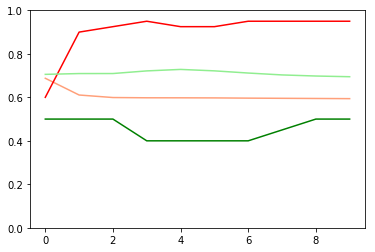

In [256]:
x = range(nb_epoch)
plt.plot(x, history.loss, color ='lightsalmon')
plt.plot(x, history.acc, color ='red')
plt.plot(x, history.val_loss, color ='lightgreen')
plt.plot(x, history.val_acc, color ='green')
plt.ylim(0,1)
